In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings ('ignore')

2024-03-06 15:12:52.302149: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 15:12:52.302278: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 15:12:52.471145: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
fruits = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv').drop('A_id', axis = 1)
fruits.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [3]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [4]:
#where missing values are present
fruits.isna().any(axis =0)

Size            True
Weight          True
Sweetness       True
Crunchiness     True
Juiciness       True
Ripeness        True
Acidity        False
Quality         True
dtype: bool

In [5]:
#remove missing values
fruits.dropna(inplace = True)
fruits['Acidity'] = fruits['Acidity'].astype(float)

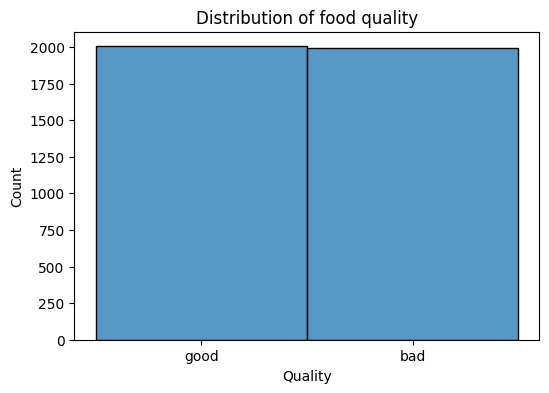

In [6]:
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(fruits['Quality'], ax = ax);
ax.set_title('Distribution of food quality');

How many good and bad fruits we have

In [7]:
good = fruits[fruits['Quality']== 'good'].shape[0]
bad = fruits.shape[0] - good
print('Number of good fruits: {}. Number of bad fruits: {}'.format(good,bad))

Number of good fruits: 2004. Number of bad fruits: 1996


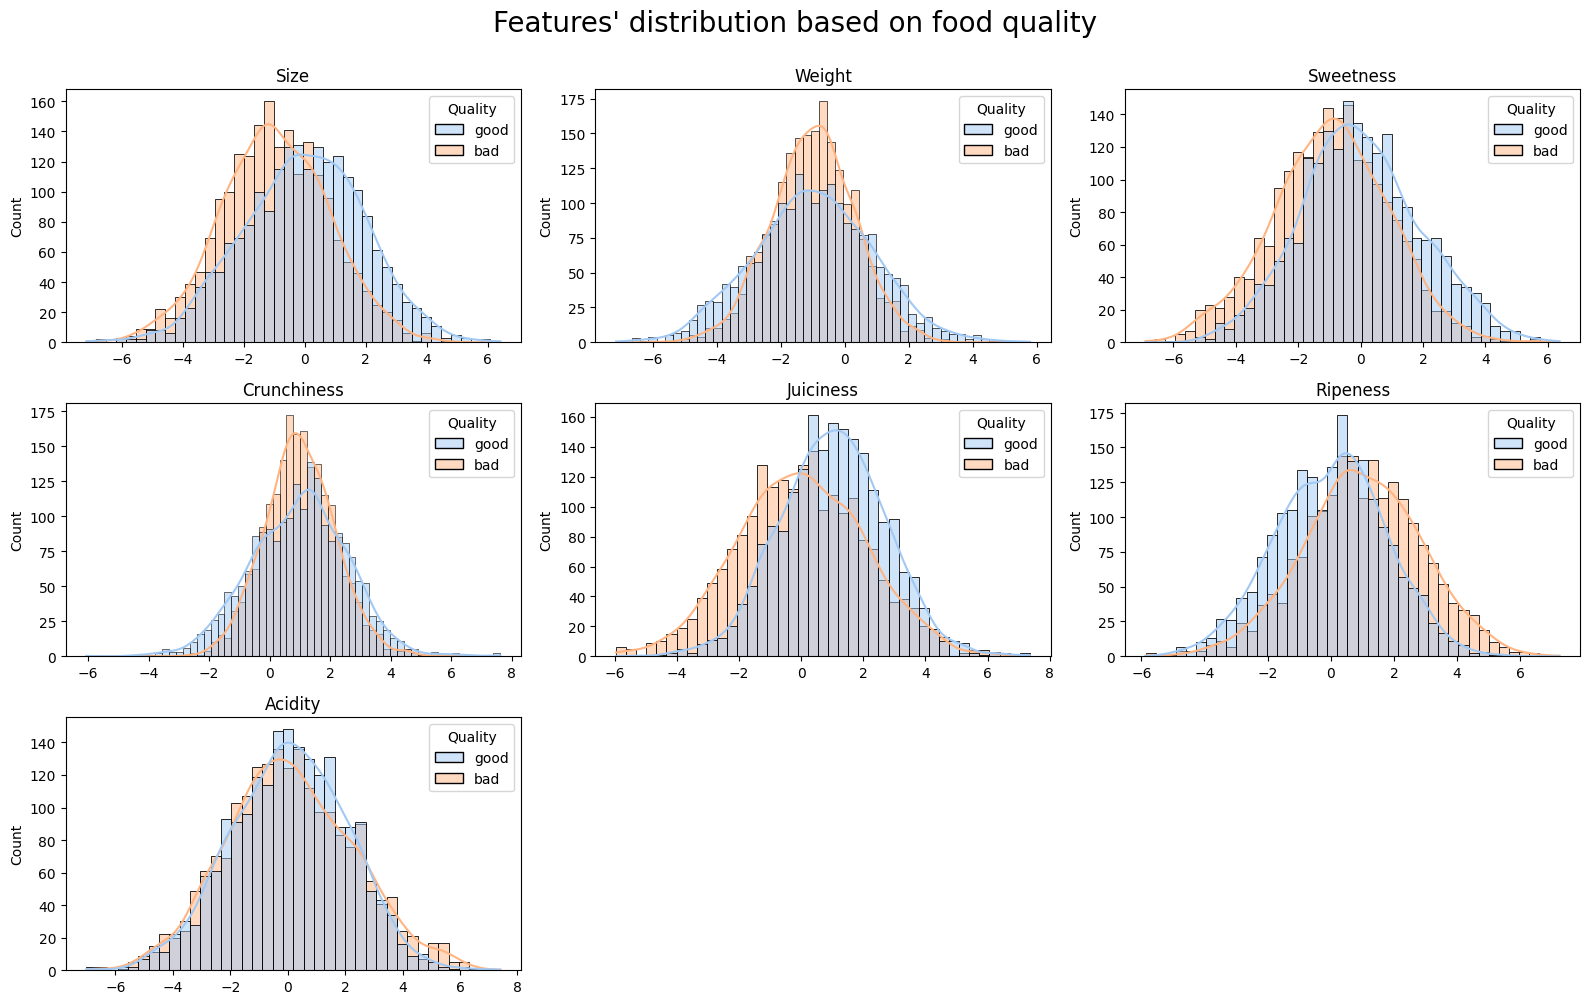

In [8]:
sns.set_palette('pastel')
features = fruits.drop('Quality', axis = 1).columns
fig =plt.figure(figsize = (16,10))
for i, feature in enumerate(features,1):
    plt.subplot(3,3,i)
    sns.histplot(data = fruits, x = feature, hue = 'Quality', kde = True)
    plt.xlabel('')
    plt.title(feature)
fig.suptitle('Features\' distribution based on food quality', fontsize=20, y = 1)
plt.tight_layout()

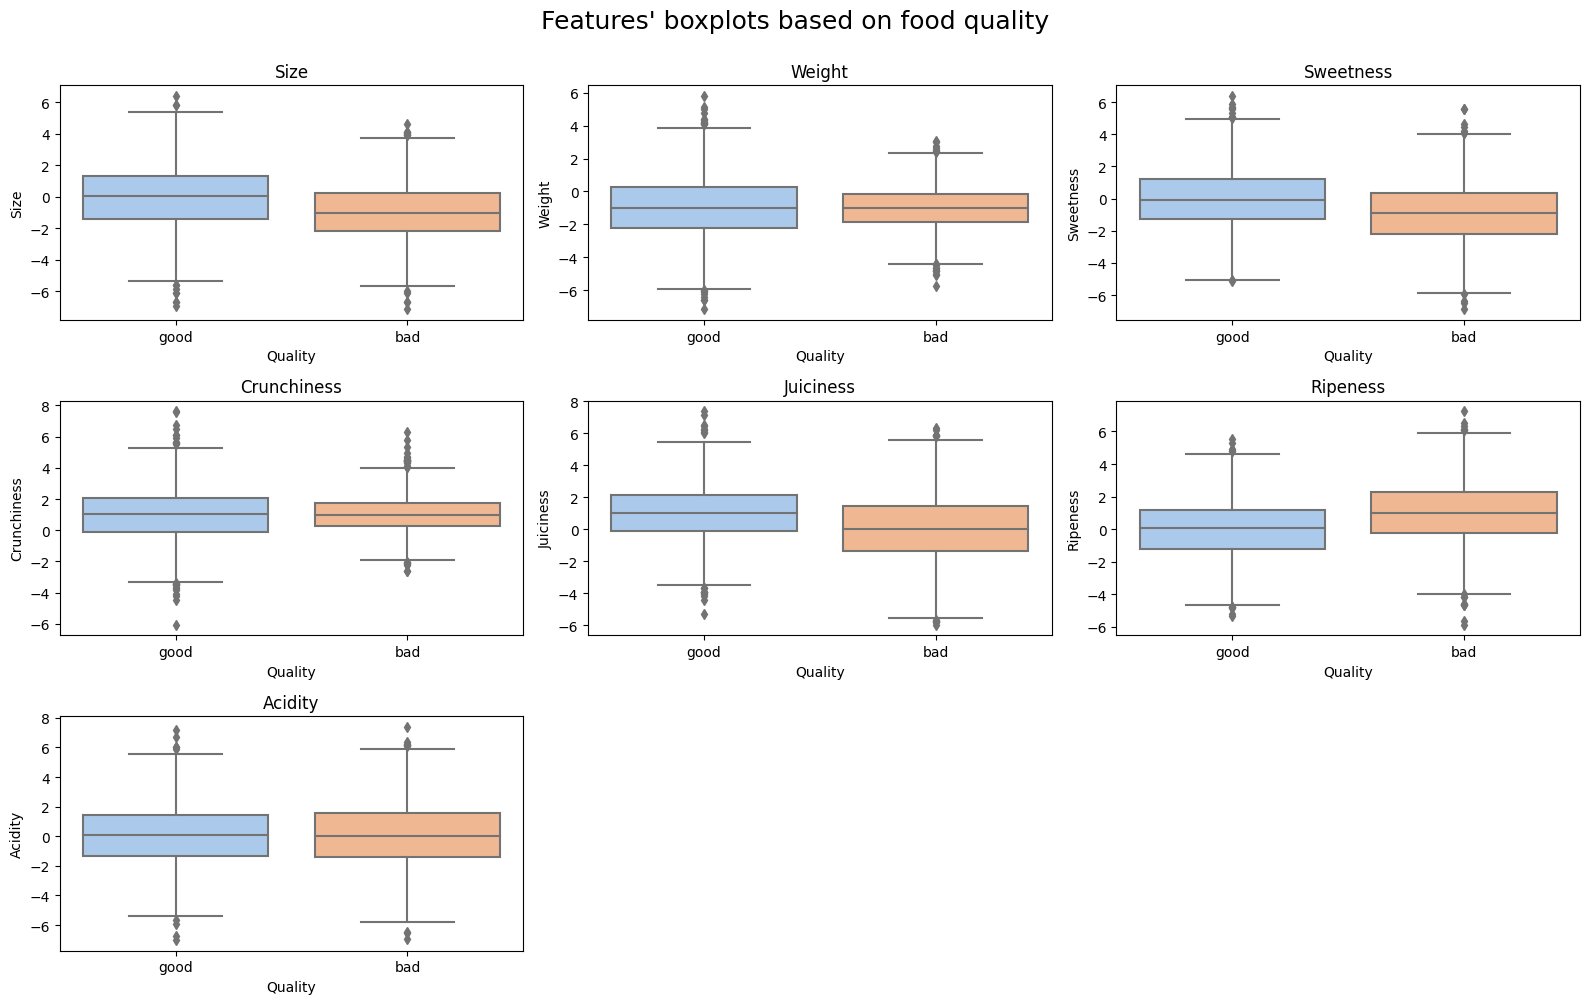

In [9]:
fig = plt.figure(figsize = (16,10))
for i, feature in enumerate(features,1):
    plt.subplot(3,3,i)
    sns.boxplot(data = fruits, y = feature, x = 'Quality')
    plt.legend(loc='upper left',frameon=False)
    plt.title(feature)
    
fig.suptitle('Features\' boxplots based on food quality', fontsize=18, y = 1)
plt.tight_layout()

In [10]:
fruits['Quality'] = fruits['Quality'].map({'bad':0,'good':1})

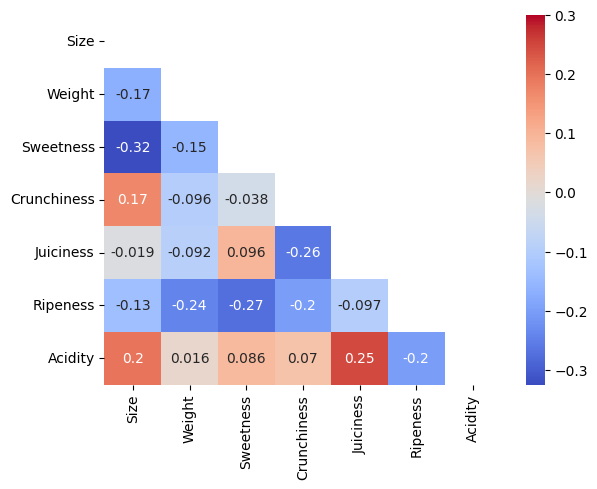

In [11]:
corr_df = fruits.drop('Quality', axis = 1).corr()
sns.heatmap(data = corr_df,annot = True,mask = np.triu(corr_df), cmap = 'coolwarm', vmax = .3);

In [12]:
features = fruits.columns.drop(['Quality'])
X, y = fruits[features], fruits['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,stratify=y)

In [13]:
scaler = RobustScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape= (X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6730 - loss: 0.5907 - val_accuracy: 0.8142 - val_loss: 0.3998
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8503 - loss: 0.3547 - val_accuracy: 0.8450 - val_loss: 0.3426
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8737 - loss: 0.3092 - val_accuracy: 0.8525 - val_loss: 0.3164
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8865 - loss: 0.2867 - val_accuracy: 0.8608 - val_loss: 0.3016
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8869 - loss: 0.2672 - val_accuracy: 0.8700 - val_loss: 0.2891
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.2721 - val_accuracy: 0.8750 - val_loss: 0.2943
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8964 - loss: 0.2601 - val_accuracy: 0.8808 - val_loss: 0.2758
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9023 - loss: 0.2451 - val_accuracy: 0.8883 - v

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9220 - loss: 0.2577 
Test Accuracy: 0.9258333444595337
